In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

from collections import Counter #Count actors

## Read in data

In [2]:
src_path = Path('data/netflix_titles.csv')

In [3]:
df = pd.read_csv(src_path)

In [4]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


## Different Countries

In [48]:
countries_lists = df.country.fillna('').to_list()

In [7]:
# Shows are available in different countries
# Take a look at some instances that have a lot of countries
sorted(countries_lists, key = lambda x: len(x))[-5:]

['Ireland, Canada, Luxembourg, United States, United Kingdom, Philippines, India',
 'Saudi Arabia, Netherlands, Germany, Jordan, United Arab Emirates, United States',
 'Ireland, France, Iceland, United States, Mexico, Belgium, United Kingdom, Hong Kong',
 'Denmark, Indonesia, Finland, Norway, United Kingdom, Israel, France, United States, Germany, Netherlands',
 'Australia, Armenia, Japan, Jordan, Mexico, Mongolia, New Zealand, Philippines, South Africa, Sweden, United States, Uruguay']

A list of unique countries that Netflix serves shows to:

In [8]:
multiple_countries = ', '.join(countries_lists).split(', ')
unique_countries = list(set(multiple_countries))
len(unique_countries)

122

Frequency of shows, grouped by country:

In [9]:
frequency_countries = dict(Counter(multiple_countries))
frequency_countries_sorted = sorted(frequency_countries.items(), key = lambda i:i[1])

In [66]:
# Top 5 countries by number of shows.
top5_countries = frequency_countries_sorted[-5:]
top5_countries

[('Canada', 412),
 ('', 507),
 ('United Kingdom', 722),
 ('India', 990),
 ('United States', 3296)]

## Different genres

In [37]:
genres_lists = df.listed_in.fillna('').to_list()

In [39]:
sorted(genres_lists, key = lambda x: len(x))[-5:]

[["Kids' TV", 'Korean TV Shows', 'TV Comedies'],
 ['International TV Shows',
  'Spanish-Language TV Shows',
  'Stand-Up Comedy & Talk Shows'],
 ['Dramas', 'Independent Movies', 'International Movies'],
 ['Dramas', 'International Movies', 'Music & Musicals'],
 ['Documentaries', 'International Movies', 'Music & Musicals']]

In [55]:
multiple_genres = sum(genres_lists, [])
unique_genres = list(set(multiple_genres))
print('Unique genres:', len(unique_genres))

Unique genres: 42


In [56]:
frequency_genres = dict(Counter(multiple_genres))
frequency_genres_sorted = sorted(frequency_genres.items(), key = lambda i:i[1])

In [63]:
top5_genres = frequency_genres_sorted[-5:]
top5_genres

[('Documentaries', 786),
 ('International TV Shows', 1199),
 ('Comedies', 1471),
 ('Dramas', 2106),
 ('International Movies', 2437)]

## Save descriptive variables

In [62]:
shows_total = df.shape[0]
countries_total = len(unique_countries)
genres_total = len(unique_genres)
print('Number of shows: {}, number of countries: {}, number of genres: {}'.format(shows_total, countries_total, genres_total))

Number of shows: 7787, number of countries: 122, number of genres: 42


## Count genre by country

Pivot country and genre.

Take a look at the way values are represented in the data.

In [11]:
print(df.iloc[7782]['country'])
print(df.iloc[7782]['listed_in'])

Sweden, Czech Republic, United Kingdom, Denmark, Netherlands
Dramas, International Movies


The entries are separated by `', '`

In [12]:
# Split lists
df.country = df.country.fillna('').apply(lambda x: x.split(', '))
df.listed_in = df.listed_in.fillna('').apply(lambda x: x.split(', '))

In [13]:
df[['country','listed_in']].head(3)

,country,listed_in
0,[Brazil],"[International TV Shows, TV Dramas, TV Sci-Fi ..."
1,[Mexico],"[Dramas, International Movies]"
2,[Singapore],"[Horror Movies, International Movies]"


In [16]:
df_country_by_genre = df[['show_id','title','country','listed_in']].explode('country').explode('listed_in')
df_country_by_genre.reset_index(drop=True, inplace=True)

In [23]:
df_country_by_genre.head()

,show_id,title,country,listed_in
0,s1,3%,Brazil,International TV Shows
1,s1,3%,Brazil,TV Dramas
2,s1,3%,Brazil,TV Sci-Fi & Fantasy
3,s2,7:19,Mexico,Dramas
4,s2,7:19,Mexico,International Movies


In [233]:
df_pivot = df_country_by_genre.groupby(['country','listed_in']).size().unstack().fillna(0).astype(int)
#df_country_by_genre['total_movies'] = df_country_by_genre.groupby(['country']).size().sort_values(ascending = False)

In [234]:
df_pivot.head()

listed_in,Action & Adventure,Anime Features,Anime Series,British TV Shows,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,Cult Movies,...,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers
country,,,,,,,,,,,,,,,,,,,,,
,15,0,10,12,53,0,0,42,31,0,...,9,55,81,1,1,3,5,1,1,11
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Albania,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Algeria,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Angola,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Table with percentages

In [210]:
total_per_country = list(df_country_by_genre.groupby(['country']).size().values)
total_per_genre = list(df_country_by_genre.groupby('listed_in').size().values)

In [235]:
df_pct_country = (df_pivot.divide(total_per_country, axis='rows') * 100).round(2)
df_pct_genre = (df_pivot.divide(total_per_genre) * 100).round(2)

In [236]:
df_pct_genre

listed_in,Action & Adventure,Anime Features,Anime Series,British TV Shows,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,Cult Movies,...,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers
country,,,,,,,,,,,,,,,,,,,,,
,1.51,0.0,6.25,4.36,7.46,0.0,0.00,2.41,6.26,0.0,...,4.97,9.77,10.28,1.3,0.96,3.26,41.67,1.72,1.67,1.61
Afghanistan,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
Albania,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
Algeria,0.00,0.0,0.00,0.00,0.00,0.0,0.76,0.00,0.00,0.0,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
Angola,0.10,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vatican City,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
Venezuela,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
Vietnam,0.20,0.0,0.00,0.00,0.00,0.0,0.00,0.11,0.00,0.0,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.15


## Restrict table to interesting countries & genres

In [115]:
interesting_entries = df_pivot > 30
intresting_genres_mask = interesting_entries.sum() > 5
intresting_countries_mask = interesting_entries.sum(axis=1) > 5

interesting_genres = list(df_pivot.columns[intresting_genres_mask])
interesting_countries = list(df_pivot.index[intresting_countries_mask])
interesting_countries.remove('')

print(interesting_genres)
print(interesting_countries)

['Action & Adventure', 'Comedies', 'Dramas', 'International Movies', 'International TV Shows', 'Thrillers']
['Canada', 'France', 'India', 'Spain', 'United Kingdom', 'United States']


In [132]:
df_intr = df_pivot.loc[interesting_countries][interesting_genres]
df_intr

listed_in,Action & Adventure,Comedies,Dramas,International Movies,International TV Shows,Thrillers
country,,,,,,
Canada,37,81,71,56,24,45
France,32,48,145,191,40,33
India,134,308,626,828,60,88
Spain,5,43,73,130,51,37
United Kingdom,75,85,156,148,116,51
United States,315,588,716,146,67,251


<AxesSubplot:ylabel='country'>

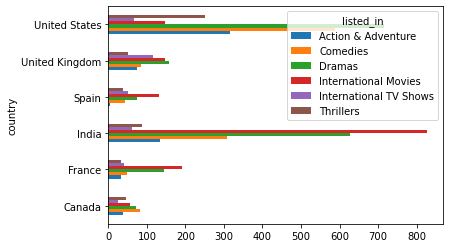

In [140]:
df_intr.plot.barh()

<AxesSubplot:ylabel='country'>

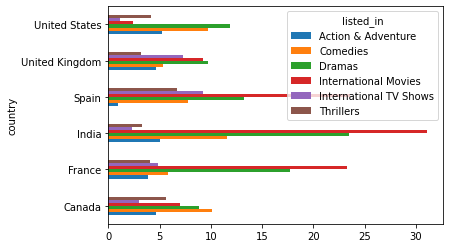

In [238]:
df_pct_country.loc[interesting_countries][interesting_genres].plot.barh()